# Проект: Линейные модели в машинном обучении #

__Анализ данных, создание линейных моделей и решение задач регрессии и классификации для владельца молочного хозяйства "Вольный луг"__ 

__Описание проекта__:
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

__Цель проекта__:
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

__Ход исследования__:  
Шаг 1. Загрузка и изучение данных  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Проведение корреляционного анализа признаков в датасете ferma_main.csv  
Шаг 5. Задача регрессии  
Шаг 6. Задача классификации  
Шаг 7. Итоговые выводы  

# Шаг 1. Загрузка и изучение данных

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_curve
from matplotlib.ticker import MultipleLocator

In [205]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=',')
display(ferma_main.head(5))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [206]:
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal=',')
display(ferma_dad.head(5))

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [207]:
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=',')
display(cow_buy.head(5))

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


# Шаг 2 предобработка данных

In [208]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [209]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [210]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


1.Переведем названия столбцов в каждой таблице к стилю Snake Case

In [211]:
#Энергетическая кормовая единица - Energy feed unit
#Сахаро-протеиновое соотношение - Sugar-protein ratio

ferma_main = ferma_main.rename(columns = {'Удой, кг': 'milk_production_kg', 'ЭКЕ (Энергетическая кормовая единица)' : 'efu', 'Сырой протеин, г' : 'raw_protein_g', 'СПО (Сахаро-протеиновое соотношение)' : 'spr', 'Порода': 'breed', 'Тип пастбища':'pasture_type', 'порода папы_быка':'daddys_breed', 'Жирность,%': 'fats_%', 'Белок,%':'protein_%', 'Вкус молока': 'milk_taste', 'Возраст': 'age'})
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  634 non-null    int64  
 1   milk_production_kg  634 non-null    int64  
 2   efu                 634 non-null    float64
 3   raw_protein_g       634 non-null    int64  
 4   spr                 634 non-null    float64
 5   breed               634 non-null    object 
 6   pasture_type        634 non-null    object 
 7   daddys_breed        634 non-null    object 
 8   fats_%              634 non-null    float64
 9   protein_%           634 non-null    float64
 10  milk_taste          634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [212]:
ferma_dad = ferma_dad.rename(columns = {'Имя Папы': 'daddys_name'})
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   daddys_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [213]:
cow_buy = cow_buy.rename(columns = {'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка' : 'daddys_breed', 'Имя_папы': 'daddys_name', 'Текущая_жирность,%':'fats_%', 'Текущий_уровень_белок,%':'protein_%', 'Возраст':'age'})
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   daddys_breed  20 non-null     object 
 3   daddys_name   20 non-null     object 
 4   fats_%        20 non-null     float64
 5   protein_%     20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


2. Преобразуем данные в нужные типы

In [214]:
#ferma_main['efu'] = ferma_main['efu'].str.replace(',', '.').astype(float)
#ferma_main['spr'] = ferma_main['spr'].str.replace(',', '.').astype(float)
#ferma_main['fats_%'] = ferma_main['fats_%'].str.replace(',', '.').astype(float)
#ferma_main['protein_%'] = ferma_main['protein_%'].str.replace(',', '.').astype(float)

In [215]:
#cow_buy['fats_%'] = cow_buy['fats_%'].str.replace(',', '.').astype(float)
#cow_buy['protein_%'] = cow_buy['protein_%'].str.replace(',', '.').astype(float)

3. Обработка пропусков, явных и неявных дубликатов

In [216]:
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

5
0
4


In [217]:
ferma_main[ferma_main.duplicated(keep=False)]

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [218]:
ferma_main = ferma_main.drop_duplicates()

In [219]:
cow_buy[cow_buy.duplicated(keep=False)]

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [220]:
cow_buy = cow_buy.drop_duplicates()

Теперь проверим датафреймы на наличие неявных дубликатов:

In [221]:
for column in ferma_main.columns:
    if ferma_main[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {ferma_main[column].unique()}')

Для столбца breed уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Для столбца pasture_type уникальные значения: ['Равнинное' 'Равнинные' 'Холмистое']
Для столбца daddys_breed уникальные значения: ['Айдиал' 'Соверин' 'Айдиалл']
Для столбца milk_taste уникальные значения: ['вкусно' 'не вкусно']
Для столбца age уникальные значения: ['более_2_лет' 'менее_2_лет']


In [222]:
for column in ferma_dad.columns:
    if ferma_dad[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {ferma_dad[column].unique()}')

Для столбца daddys_name уникальные значения: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [223]:
for column in cow_buy.columns:
    if cow_buy[column].dtype == 'object':
        print(f'Для столбца {column} уникальные значения: {cow_buy[column].unique()}')

Для столбца breed уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Для столбца pasture_type уникальные значения: ['холмистое' 'равнинное']
Для столбца daddys_breed уникальные значения: ['Айдиал' 'Соверин']
Для столбца daddys_name уникальные значения: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Для столбца age уникальные значения: ['более_2_лет' 'менее_2_лет']


Заметим, что в датафрейме ferma_main в столбцах pasture_type и daddys_breed есть неявные дубликаты, исправим это:

In [224]:
ferma_main['pasture_type'].replace('Равнинное', 'равнинное', inplace=True)
ferma_main['pasture_type'].replace('Равнинные', 'равнинное', inplace=True)
ferma_main['pasture_type'].replace('Холмистое', 'холмистое', inplace=True)
print(ferma_main['pasture_type'].unique())

['равнинное' 'холмистое']


In [225]:
ferma_main['daddys_breed'].replace('Айдиалл', 'Айдиал', inplace=True)
print(ferma_main['daddys_breed'].unique())

['Айдиал' 'Соверин']


Теперь проверим пропуски в датафреймах:

In [226]:
def check_missing_values(df):
    for column in df.columns:
        missing_values_count = df[column].isnull().sum()
        print(f"Столбец '{column}': {missing_values_count} пропусков")

In [227]:
check_missing_values(ferma_main)

Столбец 'id': 0 пропусков
Столбец 'milk_production_kg': 0 пропусков
Столбец 'efu': 0 пропусков
Столбец 'raw_protein_g': 0 пропусков
Столбец 'spr': 0 пропусков
Столбец 'breed': 0 пропусков
Столбец 'pasture_type': 0 пропусков
Столбец 'daddys_breed': 0 пропусков
Столбец 'fats_%': 0 пропусков
Столбец 'protein_%': 0 пропусков
Столбец 'milk_taste': 0 пропусков
Столбец 'age': 0 пропусков


In [228]:
check_missing_values(ferma_dad)

Столбец 'id': 0 пропусков
Столбец 'daddys_name': 0 пропусков


In [229]:
check_missing_values(cow_buy)

Столбец 'breed': 0 пропусков
Столбец 'pasture_type': 0 пропусков
Столбец 'daddys_breed': 0 пропусков
Столбец 'daddys_name': 0 пропусков
Столбец 'fats_%': 0 пропусков
Столбец 'protein_%': 0 пропусков
Столбец 'age': 0 пропусков


Пропусков в данных нет

В этом пункте мы избавились от явных и неявных дубликатов в данных, а также проверили датафреймы на пропуски

# Шаг 3. Исследовательский анализ данных

1.Статистический анализ 

In [230]:
ferma_main.head(5)

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [231]:
ferma_dad.head(5)

,id,daddys_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [232]:
cow_buy.head(5)

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [233]:
def visualize_dataframe(dataframe):
    for column in dataframe.columns:
        column_type = dataframe[column].dtype

        if column_type == 'object':
            value_counts = dataframe[column].value_counts()
            value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'{column} - Круговая диаграмма')
            plt.show()

        elif column_type in ['int64', 'float64'] and column != 'id':
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

            dataframe[column].plot.hist(bins=25, ax=axes[0])
            axes[0].set_title(f'{column} - Гистограмма')
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Частота')

            sns.boxplot(x=dataframe[column], ax=axes[1])
            axes[1].set_title(f'{column} - Boxplot')
            axes[1].set_xlabel(column)

            plt.show()
            
            print(dataframe[column].describe())

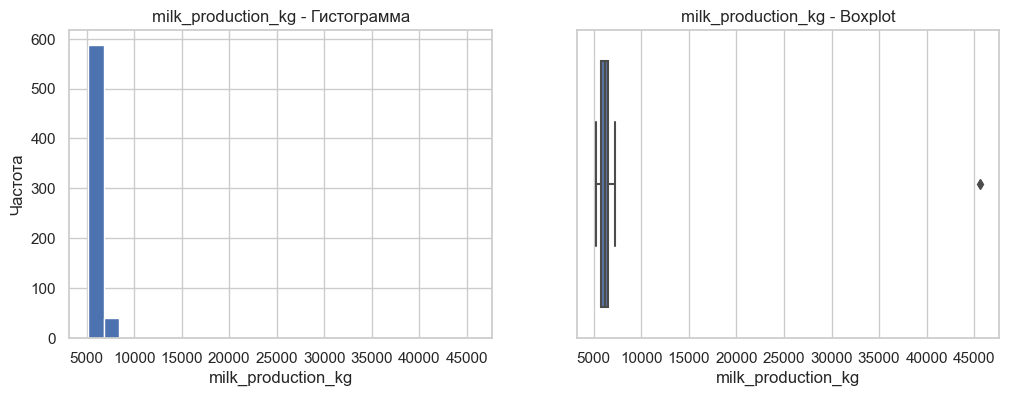

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_production_kg, dtype: float64


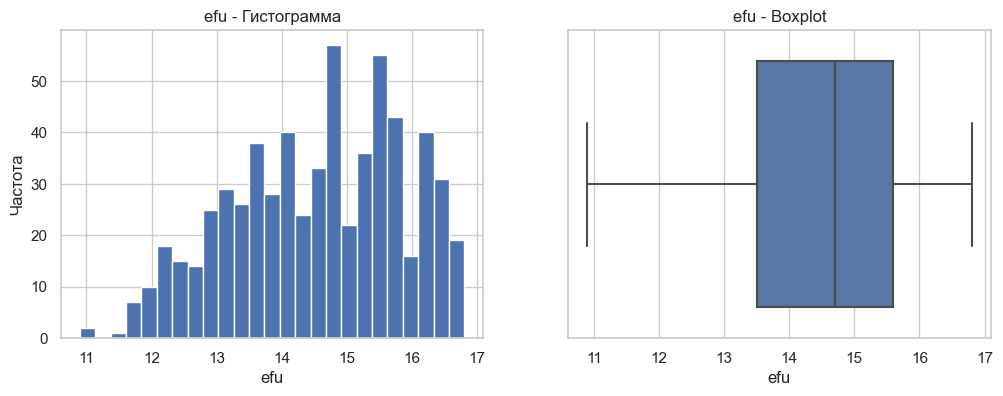

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: efu, dtype: float64


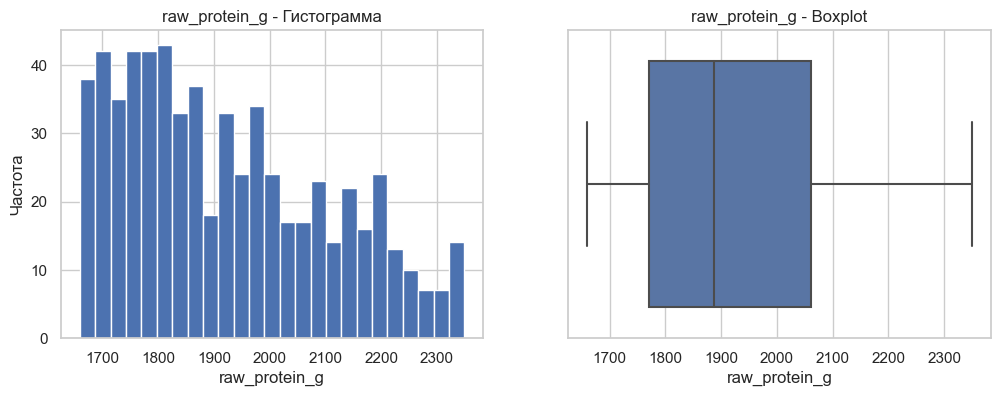

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: raw_protein_g, dtype: float64


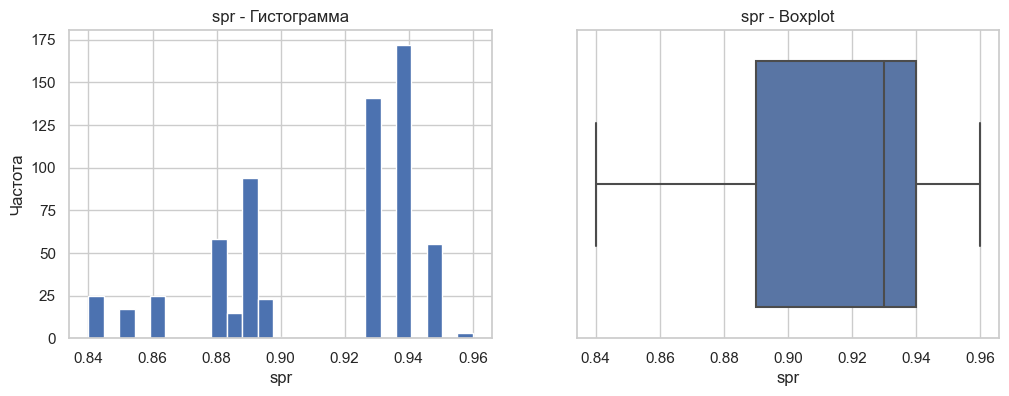

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spr, dtype: float64


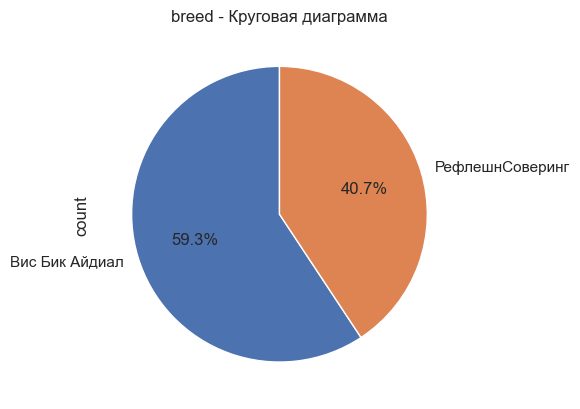

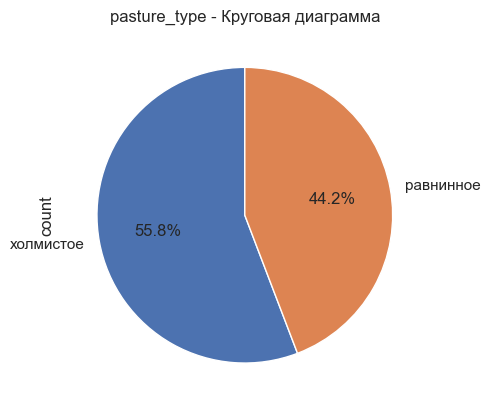

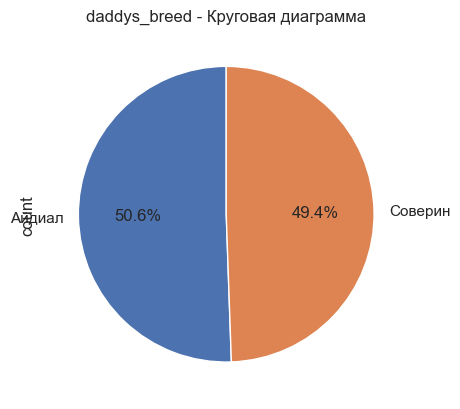

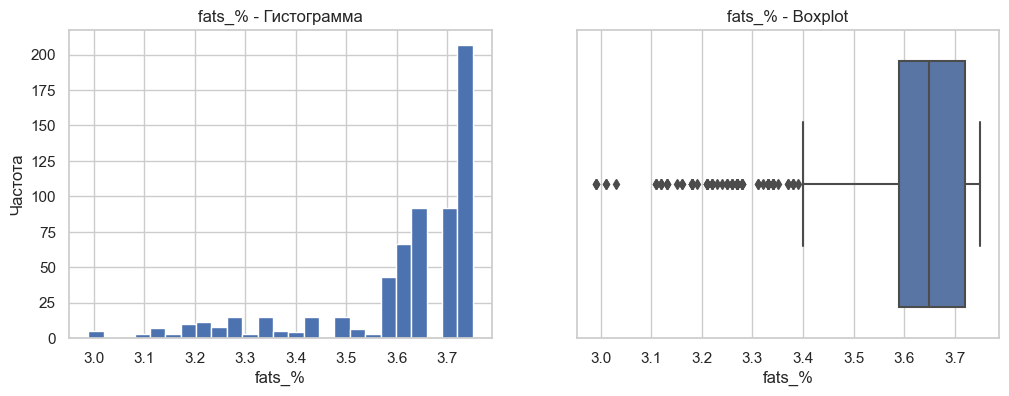

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fats_%, dtype: float64


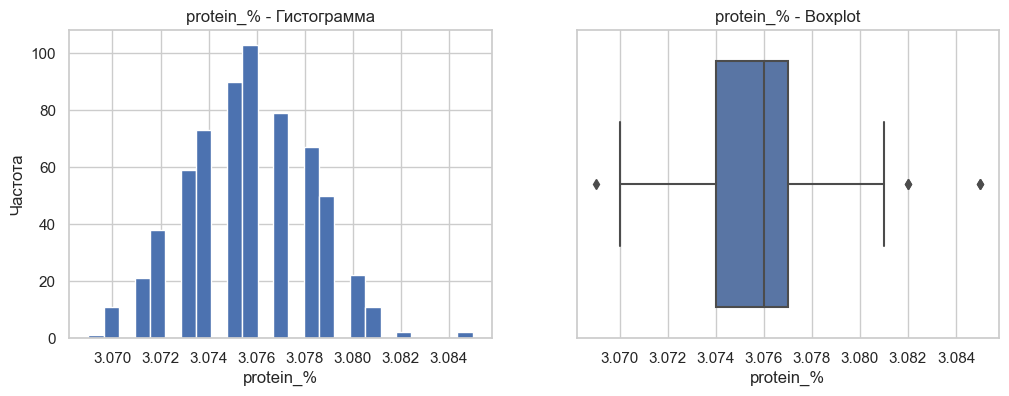

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_%, dtype: float64


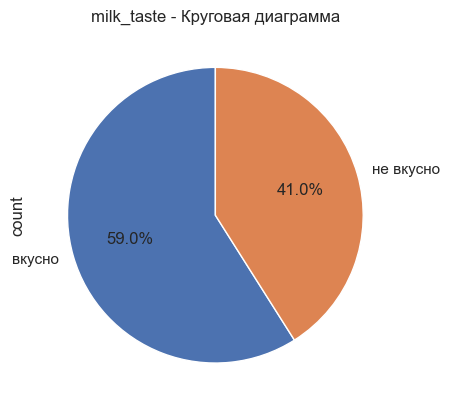

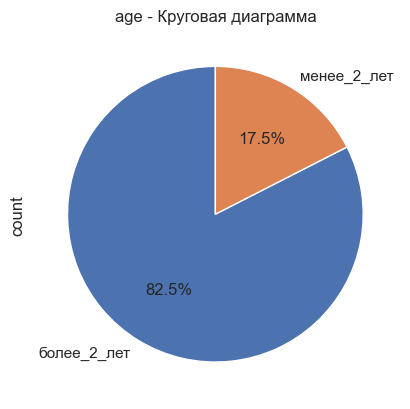

In [234]:
visualize_dataframe(ferma_main)

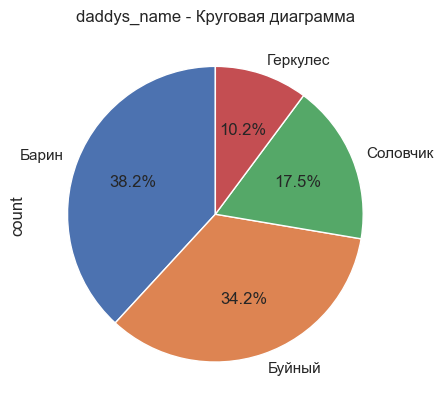

In [235]:
visualize_dataframe(ferma_dad)

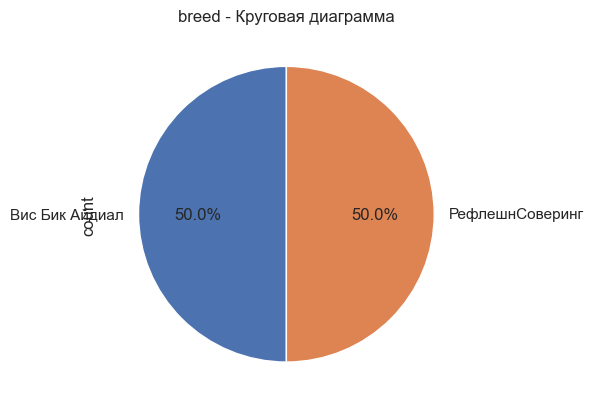

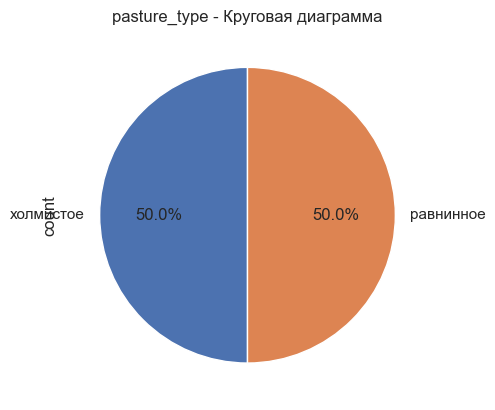

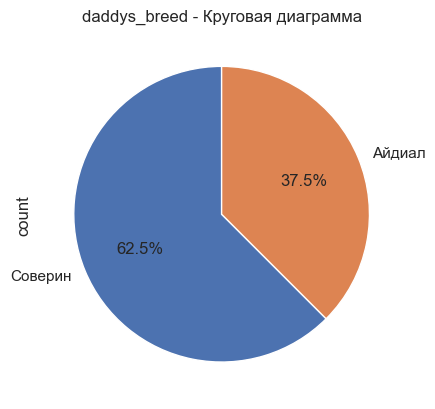

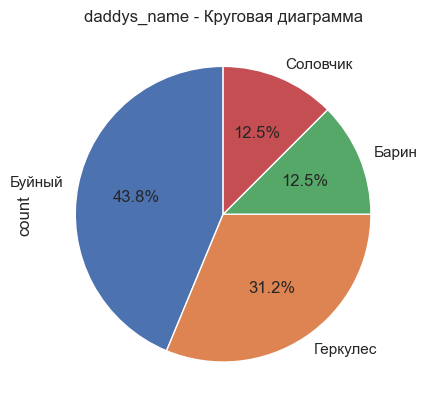

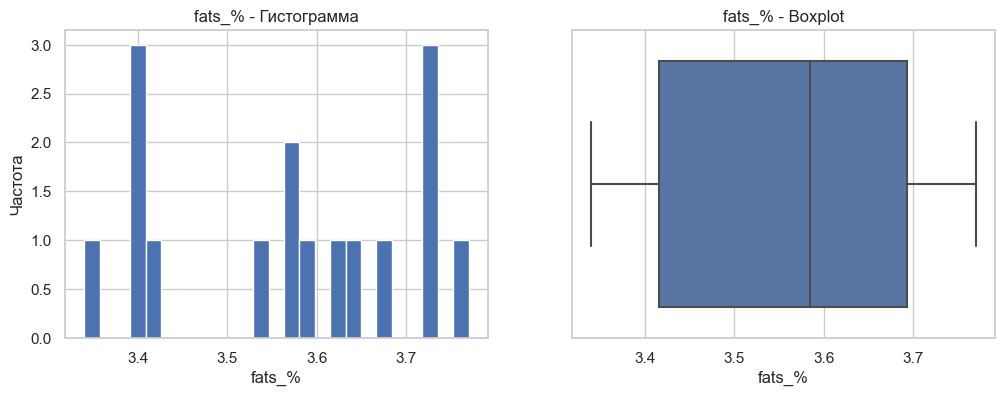

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: fats_%, dtype: float64


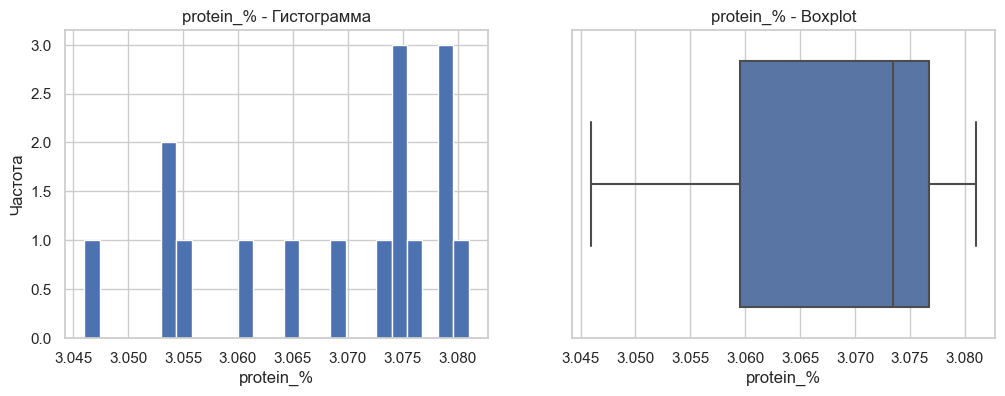

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: protein_%, dtype: float64


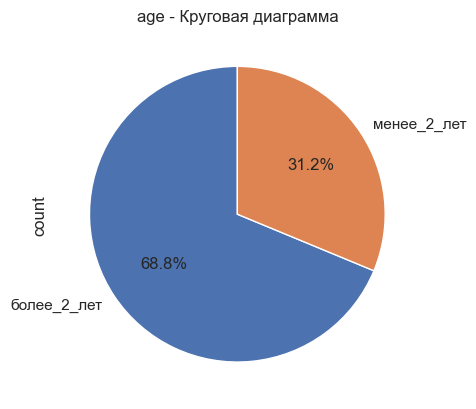

In [236]:
visualize_dataframe(cow_buy)

В датафреймах cow_buy и ferma_dad выбросов я не обнаружил. Зато в датафрейме ferma_main мне показалась подозрительной гистограма столбца milk_production_kg, давайте построим ее отдельно и разберемся есть ли там выбросы

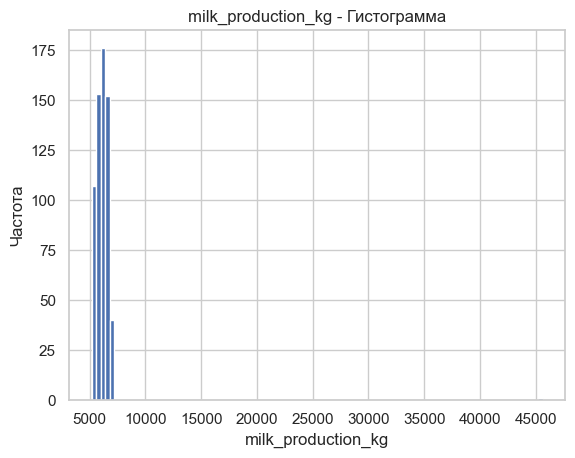

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_production_kg, dtype: float64


In [237]:
ferma_main['milk_production_kg'].plot.hist(bins = 100)
plt.title(f'milk_production_kg - Гистограмма')
plt.xlabel('milk_production_kg')
plt.ylabel('Частота')
plt.show()
            
print(ferma_main['milk_production_kg'].describe())

Как мы видим существует одно значение сильно отдаленное от всех других, вряд ли существует одна корова, которая дает в почти 9 раз больше молока чем остальные коровы, это выброс. Удалим это значение из датафрейма

In [238]:
ferma_main = ferma_main.drop(ferma_main[ferma_main['milk_production_kg'] == 45616].index, axis=0)

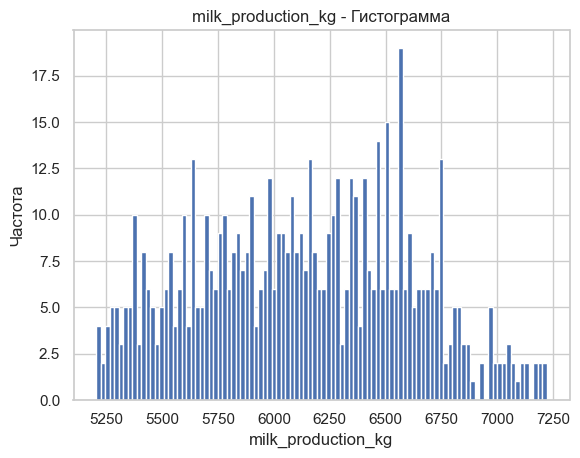

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_production_kg, dtype: float64


In [239]:
ferma_main['milk_production_kg'].plot.hist(bins = 100)
plt.title(f'milk_production_kg - Гистограмма')
plt.xlabel('milk_production_kg')
plt.ylabel('Частота')
plt.show()
            
print(ferma_main['milk_production_kg'].describe())

Теперь гисторгамма стала правдоподобнее, все значения удоя находятся на отрезке [5204; 7222]

В следующих пунктах мы будем кодировать категориальные признаки и масштабировать колличественные, пока на этапе исследовательского анализа мы это делать не будем

Количественные признаки milk_production_kg, protein_%, efu имеют гистограммы похожие на нормальное распределение, чего не скажешь о гистограммах fats_%, spr и raw_protein_g

# Шаг 4: проведение корреляционного анализа признаокв в датасете

1. Изучим взаимосвязь между признаками: расчитаем коэффиценты корреляции между всеми признаками

<Axes: >

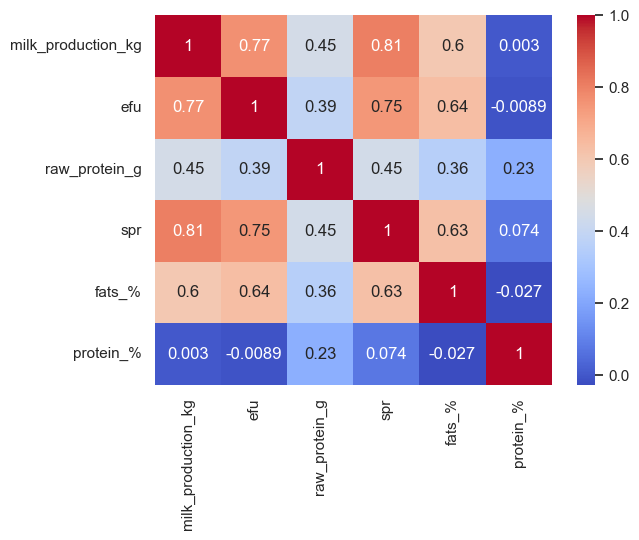

In [240]:
numeric_ferma_main = ferma_main.select_dtypes(include=['number'])
numeric_ferma_main = numeric_ferma_main.drop(columns = ['id'])
sns.heatmap(numeric_ferma_main.corr(), annot=True, cmap='coolwarm')

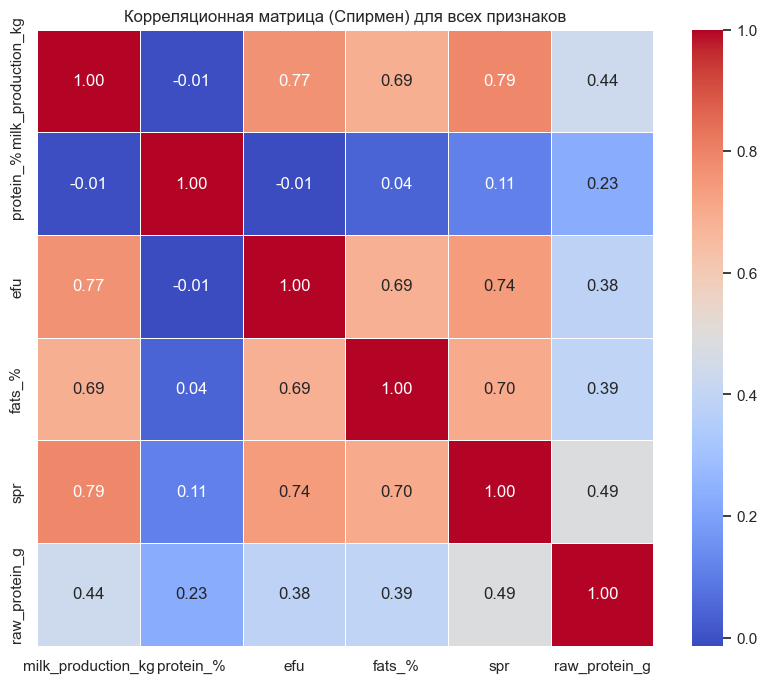

In [241]:
numeric_ferma_main = ferma_main[['milk_production_kg', 'protein_%', 'efu', 'fats_%', 'spr', 'raw_protein_g']]

spearman_corr_matrix = numeric_ferma_main.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Корреляционная матрица (Спирмен) для всех признаков')
plt.show()


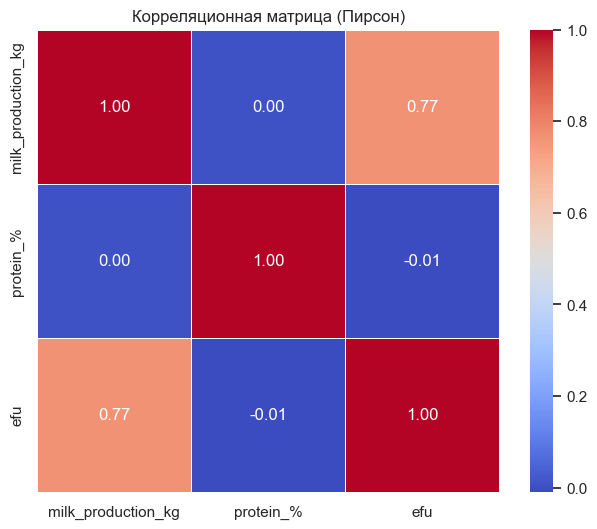

In [242]:
numeric_ferma_main = ferma_main[['milk_production_kg', 'protein_%', 'efu']]

# Подсчет корреляции Пирсона для выбранных признаков
pearson_corr_matrix = numeric_ferma_main.corr()

# Отображение корреляционной матрицы Пирсона
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

2. Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

In [243]:
ferma_main.head()

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


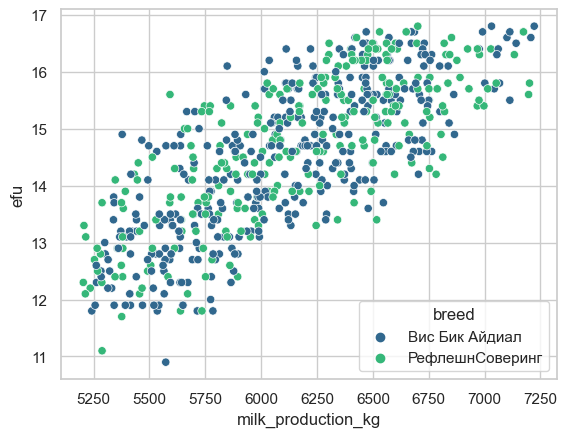

In [244]:
def scatterplot_with_category(feature1, feature2, category_feature, dataframe):
    sns.set(style="whitegrid")
    scatterplot = sns.scatterplot(x=feature1, y=feature2, hue=category_feature, data=dataframe, palette='viridis')
    scatterplot.legend(title=category_feature)
    plt.show()
scatterplot_with_category('milk_production_kg', 'efu', 'breed', ferma_main)   

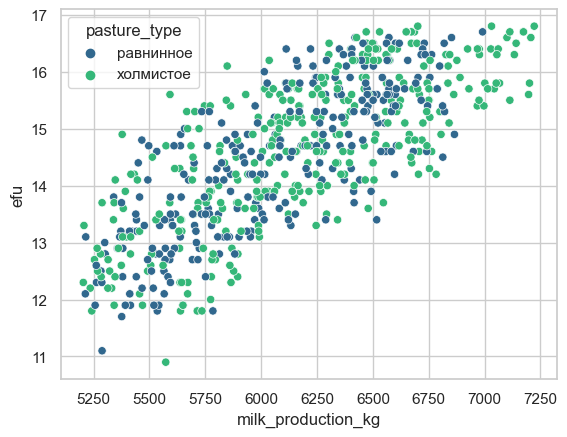

In [245]:
scatterplot_with_category('milk_production_kg', 'efu', 'pasture_type', ferma_main)   

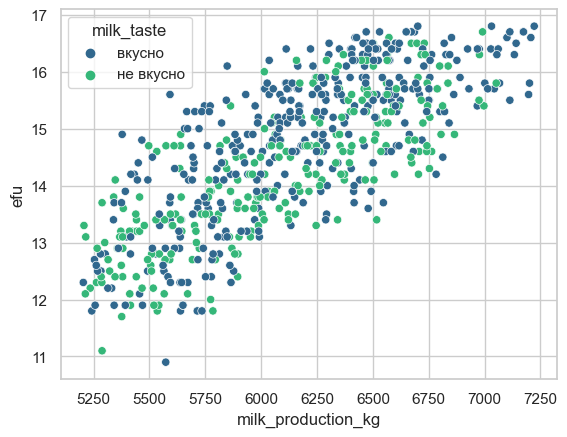

In [246]:
scatterplot_with_category('milk_production_kg', 'efu', 'milk_taste', ferma_main)

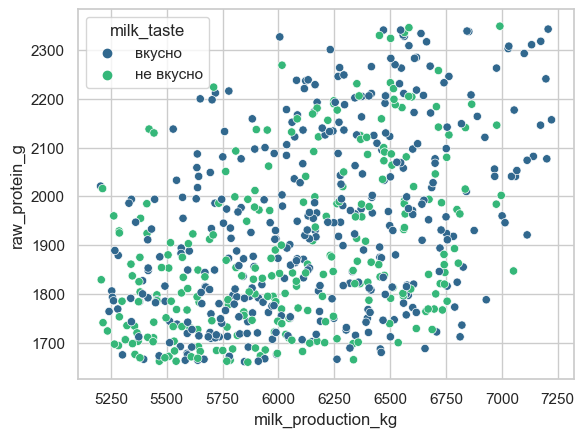

In [247]:
scatterplot_with_category('milk_production_kg', 'raw_protein_g', 'milk_taste', ferma_main)

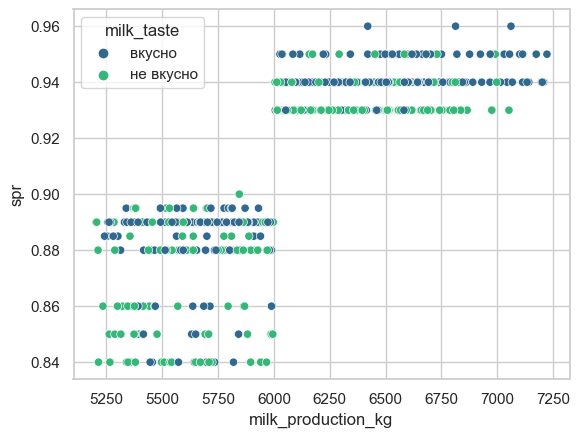

In [248]:
scatterplot_with_category('milk_production_kg', 'spr', 'milk_taste', ferma_main)

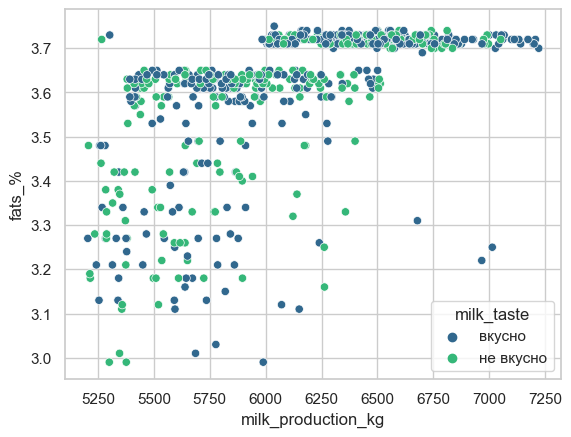

In [249]:
scatterplot_with_category('milk_production_kg', 'fats_%', 'milk_taste', ferma_main)

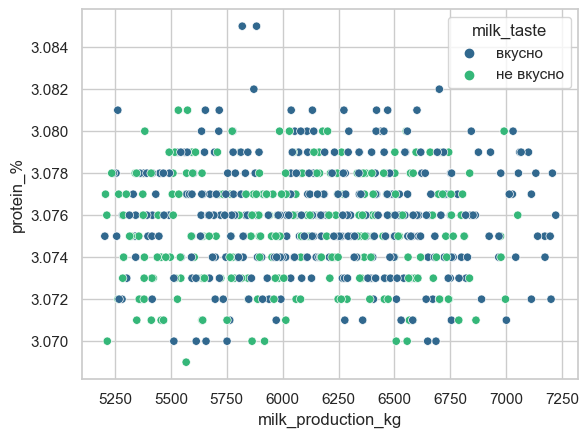

In [250]:
scatterplot_with_category('milk_production_kg', 'protein_%', 'milk_taste', ferma_main)

Мы сделали корреляционный анализ, из которого можем сделать некоторые выводы:
В дальнейшей работе нам точно не стоит учитывать параметр raw_protein_g, ведь он точно не имеет линейную зависимость с milk_production, так же как и raw_protein, который не коррелирует с milk_production_kg, у них корреляция близка к 0. Оставшиеся 3 параметра - efu, spr и fats_% будет использовать для обучения модели

Между целевым и входными признаками наблюдается прямая линейная зависимость, на что указывает положительная корреляция

Мультиколлинеарность возникает, когда два или более признака сильно коррелируют между собой. Это может затруднить интерпретацию весов признаков в модели. Если обнаруживается мультиколлинеарность, можно рассмотреть методы её решения, такие как исключение одного из сильно коррелирующих признаков или применение методов регуляризации. В наших данных она не наблюдается

Мы заметили, что spr и milk_production_kg связаны нелинейно, также как и efu, эту нелинейность мы исправим далее в работе

# Шаг 5. Задача регрессии

Нам предстоит обучить три модели простой линейной регрессии

__1.Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression__

Будем использовать метрики spr, fats_%, efu

In [251]:
X = ferma_main.drop(['milk_production_kg', 'protein_%', 'fats_%', 'milk_taste'], axis=1)
y = ferma_main['milk_production_kg']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test, y_test)

(471, 8)
(157, 8)
(471,)
(157,)
      id   efu  raw_protein_g    spr            breed pasture_type  \
582  583  13.9           1776  0.880   Вис Бик Айдиал    холмистое   
592  593  16.4           1930  0.940  РефлешнСоверинг    холмистое   
551  552  13.9           1800  0.860  РефлешнСоверинг    холмистое   
214  215  13.3           1731  0.880   Вис Бик Айдиал    равнинное   
486  487  15.3           1666  0.890   Вис Бик Айдиал    холмистое   
..   ...   ...            ...    ...              ...          ...   
84    85  16.7           2018  0.930   Вис Бик Айдиал    холмистое   
285  286  15.4           2056  0.940  РефлешнСоверинг    холмистое   
577  578  15.3           1946  0.940   Вис Бик Айдиал    равнинное   
80    81  14.9           1849  0.895   Вис Бик Айдиал    равнинное   
24    25  13.2           1703  0.895   Вис Бик Айдиал    равнинное   

    daddys_breed          age  
582       Айдиал  более_2_лет  
592      Соверин  более_2_лет  
551      Соверин  менее_2_лет  

Не будем использовать данные о milk_taste для обучения данной модели, ведь далле в cow_buy у нас таких данных нет

ъНа удой коровы могут влиять показатель питательности корма коровы(efu), отношение сахара к протеину в корме(spr), порода, тип пастьбища, порода отца, возраст коровы, также включим в этот списко показатель сырой протеин в корме(raw_protein_g), а такие показатели как жирность и белок не влияют на удой 

In [252]:
warnings.filterwarnings("ignore")
encoder = OneHotEncoder(drop='first', sparse=False)

cat_col_names = ['breed', 'pasture_type', 'daddys_breed', 'age']
num_col_names = ['efu',
                 'spr',
                 'raw_protein_g']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем пять первых строк из тренировочного датафрейма командой print()
print(X_train.head())

   x0_РефлешнСоверинг  x1_холмистое  x2_Соверин  x3_менее_2_лет       efu  \
0                 1.0           1.0         1.0             0.0  1.502378   
1                 1.0           1.0         1.0             1.0 -1.557270   
2                 0.0           0.0         0.0             0.0  0.125537   
3                 0.0           1.0         0.0             0.0 -0.103937   
4                 0.0           0.0         0.0             0.0 -1.098323   

        spr  raw_protein_g  
0  0.837130       1.079523  
1 -0.703660      -0.196920  
2 -1.011818      -1.386085  
3  0.837130       0.752230  
4 -0.703660       0.828598  


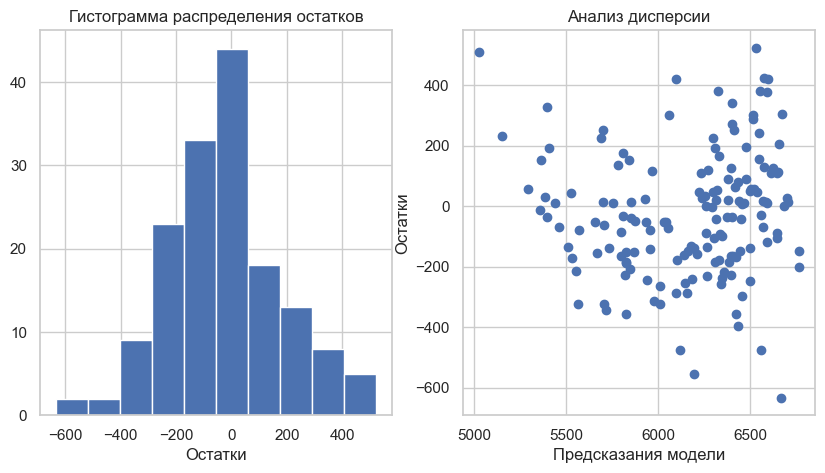

0.7844078173416967
43887.015009660514
209.4922791170608
164.24194463474925


In [253]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
r2_1 = r2_score(y_test, predictions)
print(r2_1)
mse_1 = mean_squared_error(y_test, predictions)
print(mse_1)
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
print(rmse_1)
mae_1 = mean_absolute_error(y_test, predictions)
print(mae_1)

Коэффициент детерминации, известный как R², получился равным 0.78, это значит что модель работает не плохо, но ее можно улучшать

Распределение остатков немного смещено влево, разброс дисперсия имеет постоянный разброс, отклонения минимальны.

Основное правило анализа остатков: если модель правильно подобрана к исходным данным, то в остатках не должно остаться никаких закономерностей. Систематические паттерны в остатках означают, что модель не учитывает какие-то входные признаки, которые влияют на целевой.
Пример: метрики показывают, что модель отлично предсказывает объём продаж товара, однако в остатках наблюдаются систематические выбросы. Это означает, что модель может не учитывать какие-то события — например, праздники, из-за которых подскакивают продажи.  
Нормальное распределение остатков  
Узнать распределение данных проще всего с помощью графика.  
Постоянство дисперсии  
Для проверки этого свойства также есть подходящий график — диаграмма рассеяния. Она позволяет проследить, как один показатель меняется при изменении другого. Здесь как раз подходящий случай: вам нужно отследить, как остатки меняются в зависимости от прогнозных значений модели.

__2. Вторая модель LinearRegression__

Мы уже замечали, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами, это значение равно 0.92. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [254]:
ferma_main['spr_category'] = ferma_main['spr'].apply(lambda x: 'spr_more_92' if x > 0.92 else 'spr_less_92')

In [255]:
ferma_main.head()

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age,spr_category
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,spr_less_92
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,spr_less_92
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,spr_less_92
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,spr_less_92
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,spr_less_92


Также мы обнаружили, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [256]:
ferma_main['new_efu'] = ferma_main['efu'].apply(lambda x: x**2)
ferma_main.head()

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age,spr_category,new_efu
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,spr_less_92,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,spr_less_92,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,spr_less_92,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,spr_less_92,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,spr_less_92,163.84


Теперь можем подготавливать модель

In [257]:
X = ferma_main.drop(['milk_production_kg', 'protein_%', 'fats_%', 'milk_taste', 'spr'], axis=1)
y = ferma_main['milk_production_kg']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 9)
(157, 9)
(471,)
(157,)


In [258]:
warnings.filterwarnings("ignore")
encoder = OneHotEncoder(drop='first', sparse=False)

cat_col_names = ['breed', 'pasture_type', 'daddys_breed', 'age', 'spr_category']
num_col_names = ['raw_protein_g',
                 'new_efu']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем пять первых строк из тренировочного датафрейма командой print()
print(X_train.head())

   x0_РефлешнСоверинг  x1_холмистое  x2_Соверин  x3_менее_2_лет  \
0                 1.0           1.0         1.0             0.0   
1                 1.0           1.0         1.0             1.0   
2                 0.0           0.0         0.0             0.0   
3                 0.0           1.0         0.0             0.0   
4                 0.0           0.0         0.0             0.0   

   x4_spr_more_92  raw_protein_g   new_efu  
0             1.0       1.079523  1.577968  
1             0.0      -0.196920 -1.511438  
2             0.0      -1.386085  0.082269  
3             1.0       0.752230 -0.150235  
4             0.0       0.828598 -1.102358  


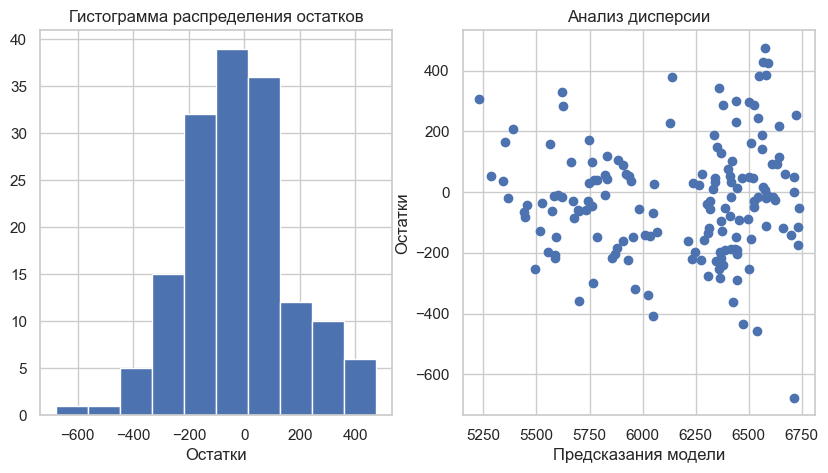

0.8180879926867503
37030.91131113693
192.43417396901447
149.03965222364596


In [259]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
r2_2 = r2_score(y_test, predictions)
print(r2_2)
mse_2 = mean_squared_error(y_test, predictions)
print(mse_2)
rmse_2 = mean_squared_error(y_test, predictions, squared=False)
print(rmse_2)
mae_2 = mean_absolute_error(y_test, predictions)
print(mae_2)

У новой моедли коэффицент r2 больше чем у первой, хоть и не на много, также видно, что гистограмма распределения остатков стала больше похожа на нормальное распределение 

__3.Теперь добавим в данные новый признак и обучим на них третью модель LinearRegression__ 

In [260]:
ferma_main = ferma_main.merge(ferma_dad, on = 'id')
ferma_main.head()

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age,spr_category,new_efu,daddys_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,spr_less_92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,spr_less_92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,spr_less_92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,spr_less_92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,spr_less_92,163.84,Барин


In [261]:
X = ferma_main.drop(['milk_production_kg', 'protein_%', 'fats_%', 'milk_taste', 'spr'], axis=1)
y = ferma_main['milk_production_kg']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 10)
(157, 10)
(471,)
(157,)


In [262]:
warnings.filterwarnings("ignore")
encoder = OneHotEncoder(drop='first', sparse=False)

cat_col_names = ['breed', 'pasture_type', 'daddys_breed', 'age', 'spr_category', 'daddys_name']
num_col_names = ['raw_protein_g',
                 'new_efu']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем пять первых строк из тренировочного датафрейма командой print()
print(X_train.head())

   x0_РефлешнСоверинг  x1_холмистое  x2_Соверин  x3_менее_2_лет  \
0                 1.0           1.0         1.0             0.0   
1                 1.0           1.0         1.0             1.0   
2                 0.0           0.0         0.0             0.0   
3                 0.0           1.0         0.0             0.0   
4                 0.0           0.0         0.0             0.0   

   x4_spr_more_92  x5_Буйный  x5_Геркулес  x5_Соловчик  raw_protein_g  \
0             1.0        0.0          0.0          1.0       1.079523   
1             0.0        0.0          0.0          0.0      -0.196920   
2             0.0        1.0          0.0          0.0      -1.386085   
3             1.0        1.0          0.0          0.0       0.752230   
4             0.0        0.0          1.0          0.0       0.828598   

    new_efu  
0  1.577968  
1 -1.511438  
2  0.082269  
3 -0.150235  
4 -1.102358  


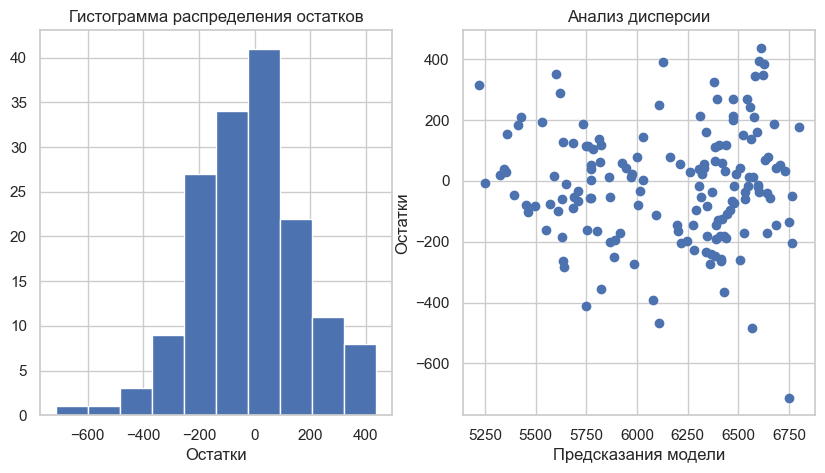

0.8247542745210407
35673.88988618193
188.87532895055915
146.16302445362314


In [263]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
r2_3 = r2_score(y_test, predictions)
print(r2_3)
mse_3 = mean_squared_error(y_test, predictions)
print(mse_3)
rmse_3 = mean_squared_error(y_test, predictions, squared=False)
print(rmse_3)
mae_3 = mean_absolute_error(y_test, predictions)
print(mae_3)

Здесь сложно заметить какое-либо отличие в графиках и сказать точно улучшилась ли модель, но параметр R² говорит о том, что моедль улучшилась

__4.Оценим качество модели каждой модели и выберем наилучшую__

In [264]:
print('r2_1 =', r2_1)
print('r2_2 =', r2_2)
print('r2_3 =', r2_3)

print('mse_1 =',mse_1)
print('mse_2 =',mse_2)
print('mse_3 =',mse_3)

print('rmse_1 =',rmse_1)
print('rmse_2 =',rmse_2)
print('rmse_3 =',rmse_3)

print('mae_1 =',mae_1)
print('mae_2 =',mae_2)
print('mae_3 =',mae_3)

r2_1 = 0.7844078173416967
r2_2 = 0.8180879926867503
r2_3 = 0.8247542745210407
mse_1 = 43887.015009660514
mse_2 = 37030.91131113693
mse_3 = 35673.88988618193
rmse_1 = 209.4922791170608
rmse_2 = 192.43417396901447
rmse_3 = 188.87532895055915
mae_1 = 164.24194463474925
mae_2 = 149.03965222364596
mae_3 = 146.16302445362314


Видно, что по всем метрикам лучшей моделью является третья, будем использовать ее, но для начала посчитаем ее доверительный интервал прогноза

In [265]:
residuals = y_test - predictions

degrees_of_freedom = len(y_test) - 1

confidence_level = 0.95

t_critical = stats.t.ppf(confidence_level + (1 - confidence_level) / 2, df=degrees_of_freedom)

# Рассчет стандартного отклонения остатков
residual_std_dev = np.std(residuals)

# Рассчет доверительных интервалов для каждого предсказания
lower_bounds = predictions - t_critical * residual_std_dev
upper_bounds = predictions + t_critical * residual_std_dev

# Вывод результатов
for i, (lower, upper) in enumerate(zip(lower_bounds, upper_bounds)):
    print(f"Доверительный интервал для коровы номер {i + 1}: ({lower}, {upper})")


Доверительный интервал для коровы номер 1: (5641.375680788728, 6385.121173795162)
Доверительный интервал для коровы номер 2: (6116.182895371277, 6859.928388377711)
Доверительный интервал для коровы номер 3: (5180.663081787872, 5924.408574794306)
Доверительный интервал для коровы номер 4: (5217.181998561294, 5960.927491567728)
Доверительный интервал для коровы номер 5: (5497.056245214781, 6240.801738221215)
Доверительный интервал для коровы номер 6: (6014.100143556848, 6757.845636563282)
Доверительный интервал для коровы номер 7: (5960.4266895993915, 6704.172182605826)
Доверительный интервал для коровы номер 8: (5831.011924136174, 6574.757417142608)
Доверительный интервал для коровы номер 9: (6379.7584160729875, 7123.503909079422)
Доверительный интервал для коровы номер 10: (5378.28126454392, 6122.026757550354)
Доверительный интервал для коровы номер 11: (6269.379212673582, 7013.124705680016)
Доверительный интервал для коровы номер 12: (6212.159341205753, 6955.904834212187)
Доверительны

Полученный вывод представляет собой доверительные интервалы для прогнозов модели на тестовых данных. Каждая строка представляет собой интервал для соответствующего наблюдения в тестовом наборе данных.

Каждый интервал состоит из двух чисел: нижней и верхней границы. Например, для первого наблюдения интервал будет [5641.37, 6385.12]. Это означает, что с 95% вероятностью истинное значение целевой переменной для этого наблюдения находится в интервале между 5641.37 и 6385.12.

__5.С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить.__

In [266]:
cow_buy.head()

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [267]:
mean_efu = ferma_main['efu'].mean()
mean_spr = ferma_main['spr'].mean()
mean_raw_protein_g = ferma_main['raw_protein_g'].mean()

mean_efu += mean_efu * 0.05
mean_spr += mean_spr * 0.05
mean_raw_protein_g += mean_raw_protein_g * 0.05

cow_buy['efu'] = mean_efu
cow_buy['spr'] = mean_spr
cow_buy['raw_protein_g'] = mean_raw_protein_g
cow_buy['spr_category'] = cow_buy['spr'].apply(lambda x: 'spr_more_92' if x > 0.92 else 'spr_less_92')
cow_buy = cow_buy.drop(['spr'], axis=1)
cow_buy.head()

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,spr_more_92
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,spr_more_92
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,spr_more_92
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,spr_more_92
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,spr_more_92


In [268]:
cow_buy_pr = cow_buy
cow_buy_pr['new_efu'] = cow_buy_pr['efu'].apply(lambda x: x**2)
cow_buy_pr = cow_buy_pr.drop(['efu', 'fats_%'], axis=1)
cow_buy_pr.head()


,breed,pasture_type,daddys_breed,daddys_name,protein_%,age,raw_protein_g,spr_category,new_efu
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.076,более_2_лет,2019.947532,spr_more_92,233.361138
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.081,менее_2_лет,2019.947532,spr_more_92,233.361138
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.074,более_2_лет,2019.947532,spr_more_92,233.361138
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.061,более_2_лет,2019.947532,spr_more_92,233.361138
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.074,более_2_лет,2019.947532,spr_more_92,233.361138


In [269]:
X_train.head()

,x0_РефлешнСоверинг,x1_холмистое,x2_Соверин,x3_менее_2_лет,x4_spr_more_92,x5_Буйный,x5_Геркулес,x5_Соловчик,raw_protein_g,new_efu
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.079523,1.577968
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.196920,-1.511438
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.386085,0.082269
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.752230,-0.150235
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.828598,-1.102358


In [270]:
cow_buy_pr_scaled = scaler.transform(cow_buy_pr[num_col_names])

cow_buy_pr_ohe = encoder.transform(cow_buy_pr[cat_col_names])

encoder_col_names = encoder.get_feature_names(cat_col_names)

cow_buy_pr_scaled = pd.DataFrame(cow_buy_pr_scaled, columns=num_col_names)

cow_buy_pr_ohe = pd.DataFrame(cow_buy_pr_ohe, columns=encoder_col_names)

cow_buy_pr_combined = pd.concat([cow_buy_pr_ohe, cow_buy_pr_scaled], axis=1)
cow_buy_pr_combined.head()

,breed_РефлешнСоверинг,pasture_type_холмистое,daddys_breed_Соверин,age_менее_2_лет,spr_category_spr_more_92,daddys_name_Буйный,daddys_name_Геркулес,daddys_name_Соловчик,raw_protein_g,new_efu
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.517384,0.542248
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.517384,0.542248
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.517384,0.542248
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248


In [272]:
predictions_cow_buy_mp = model_lr.predict(cow_buy_pr_combined)
predictions_cow_buy_mp

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6571.25973712, 6400.54066779,
       6344.70785976, 6617.92892634, 6609.91929681, 6127.4747423 ,
       6593.08937654, 6344.70785976, 6425.38021759, 6571.25973712])

In [273]:
cow_buy['milk_production_kg'] = predictions_cow_buy_mp
cow_buy

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category,new_efu,milk_production_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6542.146066
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6425.380218
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6571.259737
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6400.540668
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6344.707860
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6617.928926


В этом пункте мы спрогнозировали удой для каждой коровы из файла cow_buy и внесли эти данные в таблицу

# Шаг 6. Задача классификации

__1.Подготовка данных датасета ferma_main.csv и обучение на них модели LogisticRegression.__

In [274]:
ferma_main['milk_taste'] = ferma_main['milk_taste'].replace({'вкусно': 1, 'не вкусно': 0})
ferma_main

,id,milk_production_kg,efu,raw_protein_g,spr,breed,pasture_type,daddys_breed,fats_%,protein_%,milk_taste,age,spr_category,new_efu,daddys_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет,spr_less_92,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет,spr_less_92,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет,spr_less_92,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет,spr_less_92,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет,spr_less_92,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,0,более_2_лет,spr_more_92,237.16,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,1,менее_2_лет,spr_less_92,166.41,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,0,более_2_лет,spr_less_92,207.36,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,1,более_2_лет,spr_less_92,190.44,Барин


Будем использовать такие же признаки, что и в 5-ом шаге, но к ним добавим protein_% и fats_%, ведь они могут влиять на вкус молока

In [275]:
X = ferma_main.drop(['milk_taste', 'spr'], axis=1)
y = ferma_main['milk_taste']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.head())

(471, 13)
(157, 13)
(471,)
(157,)
      id  milk_production_kg   efu  raw_protein_g            breed  \
507  509                6498  16.5           2123  РефлешнСоверинг   
382  384                5268  12.5           1889  РефлешнСоверинг   
586  588                5610  14.7           1671   Вис Бик Айдиал   
196  198                6343  14.4           2063   Вис Бик Айдиал   
327  329                5833  13.1           2077   Вис Бик Айдиал   

    pasture_type daddys_breed  fats_%  protein_%          age spr_category  \
507    холмистое      Соверин    3.70      3.074  более_2_лет  spr_more_92   
382    холмистое      Соверин    3.34      3.072  менее_2_лет  spr_less_92   
586    равнинное       Айдиал    3.18      3.079  более_2_лет  spr_less_92   
196    холмистое       Айдиал    3.62      3.079  более_2_лет  spr_more_92   
327    равнинное       Айдиал    3.64      3.076  более_2_лет  spr_less_92   

     new_efu daddys_name  
507   272.25    Соловчик  
382   156.25       Бар

In [276]:
warnings.filterwarnings("ignore")
encoder = OneHotEncoder(drop='first', sparse=False)

cat_col_names = ['breed', 'pasture_type', 'daddys_breed', 'age', 'spr_category', 'daddys_name']
num_col_names = ['raw_protein_g',
                 'new_efu',
                 'fats_%',
                 'protein_%']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])

X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем пять первых строк из тренировочного датафрейма командой print()
print(X_train.head())

   x0_РефлешнСоверинг  x1_холмистое  x2_Соверин  x3_менее_2_лет  \
0                 1.0           1.0         1.0             0.0   
1                 1.0           1.0         1.0             1.0   
2                 0.0           0.0         0.0             0.0   
3                 0.0           1.0         0.0             0.0   
4                 0.0           0.0         0.0             0.0   

   x4_spr_more_92  x5_Буйный  x5_Геркулес  x5_Соловчик  raw_protein_g  \
0             1.0        0.0          0.0          1.0       1.079523   
1             0.0        0.0          0.0          0.0      -0.196920   
2             0.0        1.0          0.0          0.0      -1.386085   
3             1.0        1.0          0.0          0.0       0.752230   
4             0.0        0.0          1.0          0.0       0.828598   

    new_efu    fats_%  protein_%  
0  1.577968  0.562532  -0.679069  
1 -1.511438 -1.601817  -1.452568  
2  0.082269 -2.563750   1.254677  
3 -0.150235  0.081

In [277]:
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [278]:
y_test_array = y_test.values
y_test_array

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

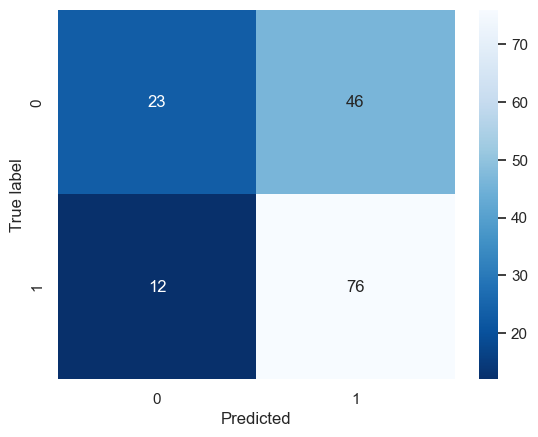

In [279]:
cm = confusion_matrix(y_test_array, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

In [280]:
precision = precision_score(y_test_array, y_pred)
recall = recall_score(y_test_array, y_pred)
acc = accuracy_score(y_test_array, y_pred)
print('acc: ', acc)
print('recall: ',recall)
print('precision: ',precision)

acc:  0.6305732484076433
recall:  0.8636363636363636
precision:  0.6229508196721312


Здесь мы видим, что модель, к сожалению давольно часто ошибается, в следующем пункте попытаемся свести к минимуму  критичные для нас ошибки

__2.Анализ модель логистической регрессии.__

Главное для заказчика — вкусное молоко, поэтому нам критически важно уменьшить количество ошибок, когда молоко является не вкусным, а мы его определяем вкусным, сейчас таких ошибок 46

Значит нам нужно ориентироваться на параметр precision

In [281]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
85         1  0.861369
110        1  0.842813
66         1  0.841492
51         1  0.839685
8          1  0.817310


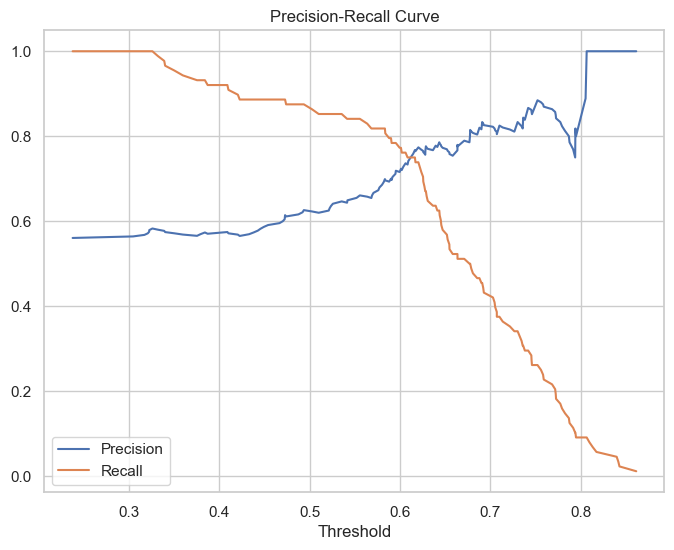

In [311]:
precisions, recalls, thresholds = precision_recall_curve(data['y_valid'], data['y_proba'])

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

  
По графику видно, что искомый нами порог >0.8, ведь именно при Threshold > 0.8 график precicion достигает 1

In [294]:
thresholds = [round(i,2) for i in np.linspace(0.8,1,num = 20,endpoint=False)]
print(thresholds) 

[0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [297]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.8  y_pred_0.81  y_pred_0.82  y_pred_0.83  \
134        0  0.641304           0            0            0            0   
82         1  0.326059           0            0            0            0   
7          1  0.704595           0            0            0            0   
11         1  0.772289           0            0            0            0   
126        0  0.422636           0            0            0            0   

     y_pred_0.84  y_pred_0.85  y_pred_0.86  y_pred_0.87  ...  y_pred_0.9  \
134            0            0            0            0  ...           0   
82             0            0            0            0  ...           0   
7              0            0            0            0  ...           0   
11             0            0            0            0  ...           0   
126            0            0            0            0  ...           0   

     y_pred_0.91  y_pred_0.92  y_pred_0.93  y_pred_0.94  y_pred_0.95  \
134     

In [298]:
for column, values in data.iloc[:, 2:].items():
    print(f"Порог: {column}, precision: {precision_score(data['y_valid'], values)}")

Порог: y_pred_0.8, precision: 0.8888888888888888
Порог: y_pred_0.81, precision: 1.0
Порог: y_pred_0.82, precision: 1.0
Порог: y_pred_0.83, precision: 1.0
Порог: y_pred_0.84, precision: 1.0
Порог: y_pred_0.85, precision: 1.0
Порог: y_pred_0.86, precision: 1.0
Порог: y_pred_0.87, precision: 0.0
Порог: y_pred_0.88, precision: 0.0
Порог: y_pred_0.89, precision: 0.0
Порог: y_pred_0.9, precision: 0.0
Порог: y_pred_0.91, precision: 0.0
Порог: y_pred_0.92, precision: 0.0
Порог: y_pred_0.93, precision: 0.0
Порог: y_pred_0.94, precision: 0.0
Порог: y_pred_0.95, precision: 0.0
Порог: y_pred_0.96, precision: 0.0
Порог: y_pred_0.97, precision: 0.0
Порог: y_pred_0.98, precision: 0.0
Порог: y_pred_0.99, precision: 0.0


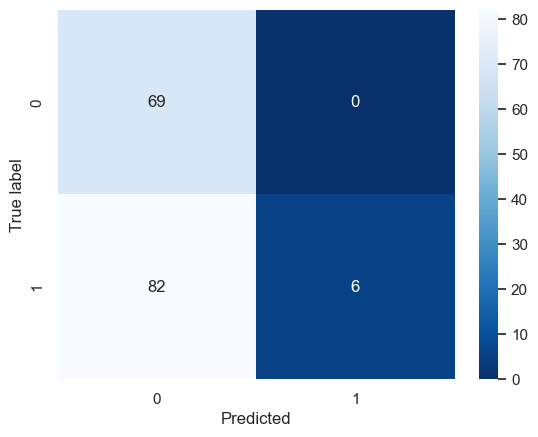

In [299]:
cm = confusion_matrix(data['y_valid'], data['y_pred_0.81'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Искомый порог - 0.81

__3.Теперь с помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.__

In [300]:
mean_fats = ferma_main['fats_%'].mean()
mean_protein = ferma_main['protein_%'].mean()

mean_protein = mean_protein 
mean_fats = mean_fats

cow_buy['fats_%'] = mean_fats
cow_buy['protein_%'] = mean_protein
cow_buy.head()

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category,new_efu,milk_production_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.604268,3.07567,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6542.146066


In [301]:
cow_buy_mt = cow_buy
cow_buy_mt.head()

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category,new_efu,milk_production_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.604268,3.07567,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6378.711028
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6283.999775
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6542.146066


In [302]:

cat_col_names = ['breed', 'pasture_type', 'daddys_breed', 'age', 'spr_category', 'daddys_name']
num_col_names = ['raw_protein_g',
                 'new_efu',
                 'fats_%',
                 'protein_%']

cow_buy_mt_scaled = scaler.transform(cow_buy_mt[num_col_names])

cow_buy_mt_ohe = encoder.transform(cow_buy_mt[cat_col_names])

encoder_col_names = encoder.get_feature_names(cat_col_names)

cow_buy_mt_scaled = pd.DataFrame(cow_buy_mt_scaled, columns=num_col_names)

cow_buy_mt_ohe = pd.DataFrame(cow_buy_mt_ohe, columns=encoder_col_names)

cow_buy_mt_combined = pd.concat([cow_buy_mt_ohe, cow_buy_mt_scaled], axis=1)
cow_buy_mt_combined.head()

,breed_РефлешнСоверинг,pasture_type_холмистое,daddys_breed_Соверин,age_менее_2_лет,spr_category_spr_more_92,daddys_name_Буйный,daddys_name_Геркулес,daddys_name_Соловчик,raw_protein_g,new_efu,fats_%,protein_%
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.517384,0.542248,-0.01302,-0.03305
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.517384,0.542248,-0.01302,-0.03305
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.517384,0.542248,-0.01302,-0.03305
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248,-0.01302,-0.03305
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.517384,0.542248,-0.01302,-0.03305


In [310]:
clf_2 = LogisticRegression()

clf_2 = clf_2.fit(X_train, y_train)
y_proba = clf_2.predict_proba(cow_buy_mt_combined)[:,1]

y_proba

array([0.70047739, 0.5288191 , 0.61189264, 0.71073525, 0.59810568,
       0.53640769, 0.57926102, 0.66699418, 0.62070644, 0.58667219,
       0.70047739, 0.67092747, 0.71073525, 0.62070644, 0.53640769,
       0.57926102])

Мы видим, что ни одно значение не превышает нашего порога в 0.81, значит нужно снижать порог 

Определим диапозон значений искомого порога, пусть он будет [0.6, 0.72], большинство полученных значений y_proba пренадлежат этому отрезку, при этом если опускать нижнюю планку порога ниже 0.6, то и precision будет уменьшаться

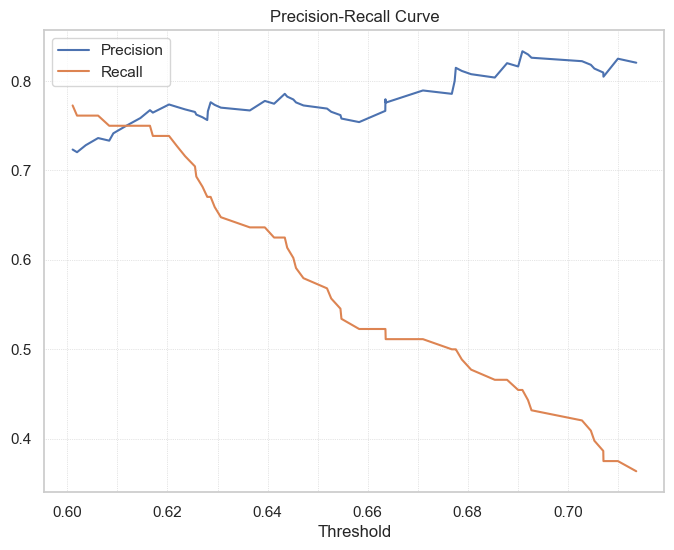

In [320]:
precisions, recalls, thresholds = precision_recall_curve(data['y_valid'], data['y_proba'])

x_range = (0.6, 0.72)

start_index = np.argmax(thresholds >= x_range[0])
end_index = np.argmax(thresholds >= x_range[1])

plt.figure(figsize=(8, 6))
plt.plot(thresholds[start_index:end_index], precisions[start_index:end_index], label='Precision')
plt.plot(thresholds[start_index:end_index], recalls[start_index:end_index], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(which='both', linestyle=':', linewidth=0.5, axis='both')
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.01))

plt.show()

По графику видно, что функция precisicion имеет локальный максимум в точке 0.69, примем это значения за порог 

In [321]:
threshold = 0.69

taste_prediction = np.where(y_proba < threshold, 'не вкусно', 'вкусно')
print(taste_prediction)

['вкусно' 'не вкусно' 'не вкусно' 'вкусно' 'не вкусно' 'не вкусно'
 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'вкусно' 'не вкусно'
 'вкусно' 'не вкусно' 'не вкусно' 'не вкусно']


In [322]:
cow_buy['milk_taste'] = taste_prediction
cow_buy

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category,new_efu,milk_production_kg,milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.604268,3.07567,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6378.711028,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6283.999775,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6542.146066,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.604268,3.07567,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6425.380218,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6571.259737,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,менее_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6400.540668,не вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6344.707860,не вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6617.928926,не вкусно


Здесь мы получили прогноз вкуса молока тех коров, которых фермер хочет купить

# Шаг 7 Подведение итоговых выводов

Прогноз вкуса молока и удоя коров был добавлен в файл cow_buy ранее, сейчас выберем коров у которых вкусное молоко и удой более 6000

In [323]:
selected_cows = cow_buy[(cow_buy['milk_production_kg'] > 6000) & (cow_buy['milk_taste'] == 'вкусно')]
display(selected_cows)

,breed,pasture_type,daddys_breed,daddys_name,fats_%,protein_%,age,efu,raw_protein_g,spr_category,new_efu,milk_production_kg,milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6609.919297,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.604268,3.07567,более_2_лет,15.276162,2019.947532,spr_more_92,233.361138,6593.089377,вкусно


Фермер может без риска потерь для себя приобрести 4 коровы из выбранных. Эти коровы соответствуют обоим критериям, необходимым фермеру: их удой превышает 6000 кг, и молоко от них оценивается как вкусное, в соответствии с данными из файла selected_cows.

Выводы о моделях линейной регрессии и логистической регрессии:

Линейная регрессия:

Использованы преобразования признаков для устранения нелинейности в связи между СПО и Удоем, а также между ЭКЕ и Удоем.
Введен новый признак (квадрат ЭКЕ) для более точного предсказания.
Добавлен признак "Имя Папы" для учета генетических факторов.
Использован OneHotEncoder для кодирования категориальных признаков и StandardScaler для масштабирования количественных.
Подсчитаны значение R² модели и других метрик качества 

Логистическая регрессия:

Целевой признак: Вкус молока.
Использован OneHotEncoder для кодирования категориальных признаков и StandardScaler для масштабирования количественных.
Рассчитаны метрики accuracy, recall и precision.
Построена матрица ошибок для анализа производительности модели.
Рассмотрено, какая ошибка (ложноположительная или ложноотрицательная) критичнее в контексте заказчика.
Порог принадлежности к классам изменен для сведения критичной ошибки к минимуму.
Выводы и дальнейшие шаги:

Дальнейший анализ может включать оптимизацию порога модели в зависимости от требований заказчика.
Важно продолжать мониторить здоровье стада и обновлять данные для улучшения прогностической точности моделей.